In [9]:
import pandas as pd
import datetime as dt
import re
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [11]:
df_real_estate = pd.read_csv('real_estate_data.csv', sep = '\t')
df_real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [12]:
df_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [13]:
df_real_estate.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


# 1. Заполнение значений и преобразование данных

## Заполнение: 


1. Меняем NaN значения в балкона на 0
Исходим из того, что если не указано наличие балкона, то его нет
2. Аналогично с признаком апартаментов, меняем на False, так как булев тип
3. Пустые значения по дням размещения меняем на 1.
В кол-ве дней нет значения 0. В случае, если объявление снимали в день публикации - мы получаем NaN
В таких случаях лучше поинтересоваться у валдельца БД, как туда попадают значения. Посмотреть примеры
4. Кол-во прудов  и парков в радиусе 3 км. Меняем на 0
5. Фильтруем строки в которых не указан город (их 49, можем пожертвовать)
Город является основной информацией для дальнейшей аналитики цены 

In [14]:
df_real_estate.loc[pd.isna(df_real_estate.balcony), 'balcony'] = 0
df_real_estate.loc[pd.isna(df_real_estate.is_apartment), 'is_apartment'] = False
df_real_estate.loc[(pd.isna(df_real_estate.days_exposition)), 'days_exposition'] = 1
df_real_estate.loc[(pd.isna(df_real_estate.ponds_around3000)), 'ponds_around3000'] = 0
df_real_estate.loc[(pd.isna(df_real_estate.parks_around3000)), 'parks_around3000'] = 0
df_real_estate = df_real_estate.drop(df_real_estate[df_real_estate.locality_name.isnull()].index, axis = 0)
#Выводим информацию по ДФ после преобразования

## Приведение str названия городов значений к единому виду:

После визуального анализа необходимо: 
1. Привести все буквы к единому регистру
2. Заменить ё на е 
3. Убрать символы

Через функции

In [15]:
def normal_loc_name(loc_name):
    """
 Функция выполняет следующие действия с поданой в нее строкой:
1. Приводит все буквы к нижнему регистру
2. Заменяет ё на е
3. Убрает лишние символы
    """
    loc_name = loc_name.lower()
    loc_name = loc_name.replace('ё', 'е')
    loc_name = re.sub("[$|@|&|,|.|\"|\']", "", loc_name)
    loc_name = re.sub("городской поселок", "поселок городского типа", loc_name)
    return loc_name

In [16]:
df_real_estate['locality_name'] = df_real_estate['locality_name'].apply(normal_loc_name)

# 2. Изменение типов данных столбцов

Меняем на инт, так как не может быть дробного значения:  
2. balcony    
3. parks_around3000  
4. ponds_around3000
5. days_exposition       

Меняем дату публикации на формат datetime, для удобства работы

In [17]:
columns_change = ['balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']
df_real_estate[columns_change] = df_real_estate[columns_change].astype('int64')
df_real_estate['first_day_exposition'] = pd.to_datetime(df_real_estate['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
df_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

 # Посчитайте и добавьте в таблицу

1. Цену квадратного метра;
2. День недели, месяц и год публикации объявления;
3. Этаж квартиры; варианты — первый, последний, другой;
4. Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [18]:
df_real_estate['price_1_m'] = round((df_real_estate.last_price / df_real_estate.total_area), 2)
df_real_estate['weekday'] = df_real_estate['first_day_exposition'].dt.day_name()
df_real_estate['month_name'] = df_real_estate['first_day_exposition'].dt.month_name()
df_real_estate['year'] = df_real_estate['first_day_exposition'].dt.year
df_real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1_m,weekday,month_name,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,1,120370.37,Thursday,March,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,Tuesday,December,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,Thursday,August,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,Friday,July,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,Tuesday,June,2018


5. Этаж квартиры; варианты — первый, последний, другой

In [19]:
#Для указания этажа напишем функцию 
def what_floor(row):
    """
На вход функции подаем строку ДФ
Функция сравнивает конкртеный этаж в строке с этажностью дома в строке. 
Если этаж первый в многоэтажном доме - пишем "первый"
Если этаж последний в многоэтажном доме - пишем "последний"
Если этаж другой в многоэтажном доме - пишем "другой"
Если В значении этажности дома значение NaN - оставляем NaN
    """
    if row['floors_total'] != row['floors_total']: row['floor_type'] = np.NaN
    else:
        if row['floor'] == 1 and row['floors_total'] != 1 :
            row['floor_type'] = 'первый'
        elif row['floor'] == row['floors_total'] and row['floors_total'] != 1 :
            row['floor_type'] = 'последний'
        else :
            row['floor_type'] = 'другой'
    return row['floor_type']

In [20]:
df_real_estate['floor_type'] = df_real_estate.apply(what_floor, axis = 1)

In [21]:
df_real_estate['living_area_ratio'] = round(df_real_estate['living_area'] / df_real_estate['total_area'] , 2)
df_real_estate['kitchen_area_ratio'] = round(df_real_estate['kitchen_area'] / df_real_estate['total_area'] , 2)

In [26]:
round(df_real_estate.describe(),2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1_m,year,living_area_ratio,kitchen_area_ratio
count,23650.00,2.365000e+04,23650.00,23650.00,14490.00,23565.00,21752.00,23650.00,21381.00,23650.00,18116.00,18139.00,23650.00,8064.00,23650.00,9085.00,23650.00,23650.00,23650.00,21752.00,21381.00
mean,9.86,6.541127e+06,60.33,2.07,2.77,10.68,34.45,5.89,10.57,0.59,28803.23,14197.86,0.47,490.83,0.59,518.06,156.58,99432.25,2017.37,0.56,0.19
std,5.68,1.089640e+07,35.66,1.08,1.26,6.59,22.04,4.88,5.90,0.96,12637.31,8606.83,0.75,342.55,0.88,277.84,213.47,50337.94,1.04,0.11,0.07
min,0.00,1.219000e+04,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00,111.83,2014.00,0.02,0.03
25%,6.00,3.400000e+06,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18575.75,9241.00,0.00,288.00,0.00,293.00,22.00,76614.96,2017.00,0.50,0.13
50%,9.00,4.650000e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.10,0.00,26756.50,13105.00,0.00,454.50,0.00,502.00,73.00,95000.00,2017.00,0.57,0.17
75%,14.00,6.799000e+06,69.70,3.00,2.80,16.00,42.30,8.00,12.00,1.00,37294.00,16293.00,1.00,612.00,1.00,730.00,198.00,114274.16,2018.00,0.64,0.23
max,50.00,7.630000e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00,1907500.00,2019.00,1.00,0.79


# Графики
Гистграммы не информативны из-за выбросов

Дополнительно рассмотрим box plot

Пример актуален для цены, высоты потолков, кол-ва дней продажи 

In [ ]:
%matplotlib inline

<AxesSubplot:title={'center':'Цена, руб.'}, ylabel='Frequency'>

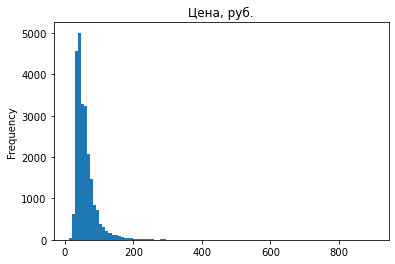

In [42]:
df_real_estate['total_area'].plot(kind = 'hist',
                                         title = 'Цена, руб.',
                                         bins = 100)

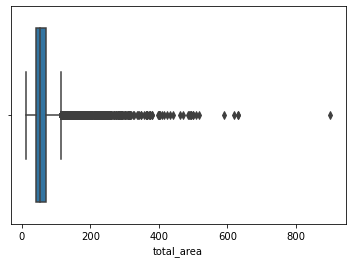

In [43]:
sns.boxplot(x = (df_real_estate['total_area']))
plt.show()

<AxesSubplot:title={'center':'Цена, руб.'}, ylabel='Frequency'>

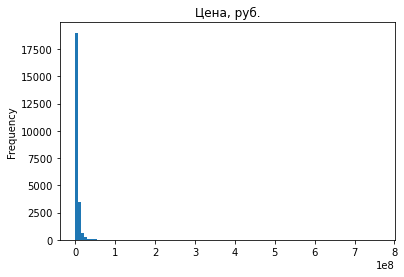

In [44]:
df_real_estate['last_price'].plot(kind = 'hist',
                                         title = 'Цена, руб.',
                                         bins = 100)

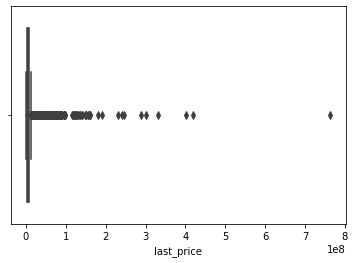

In [45]:
sns.boxplot(x = (df_real_estate['last_price']))
plt.show()

## Изучите время продажи квартиры

In [46]:
df_real_estate['days_exposition'].describe()

count    23650.000000
mean       156.583425
std        213.466293
min          1.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее и медианое значение сильно отличаются. 
Построим гистограмму, чтобы посмотреть распределение 

<AxesSubplot:title={'center':'Кол-во дней продажи'}, ylabel='Frequency'>

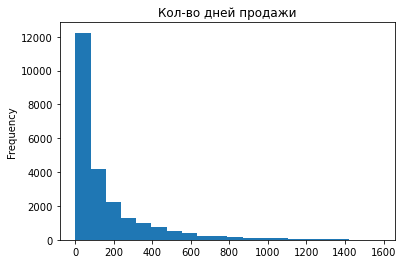

In [47]:
df_real_estate['days_exposition'].plot(kind = 'hist',
                                         title = 'Кол-во дней продажи',
                                         bins = 20)

<AxesSubplot:title={'center':'Кол-во дней продажи'}>

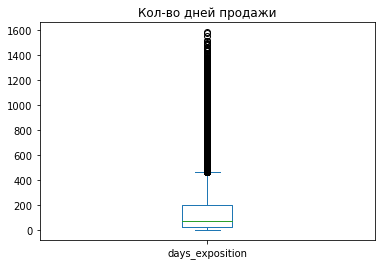

In [48]:
#Поробуем посмотреть отклонение на ящике с усами (box plot)
df_real_estate['days_exposition'].plot(kind = 'box',
                                         title = 'Кол-во дней продажи')

### Фильтруем ДФ от выбросов по статистическим формулам 
Добавляем к верхнему и нижнему квартилям межквартильную разницу умноженную на полтора 

In [30]:
def col_filter(column):
    """
Функция на вход принимает столбцы дата фрейма. 
Если столбец имеет числовой тип данных, то для данного столбца рассчитается значения фильтра 
для исключения выбросов
В противном случае вернется пустая строка 
В результате мы получим ДФ с одним столбцом в строчках которого будут готовые элементы
для фильтрации ДФ по методу df.query
Функцию обязательно вкладывать в функцию фильтрации
    """
    if column.dtype in ('float64', 'int64'):
        col_q3 = (column.quantile([0.75])).iloc[0]
        col_q1 = column.quantile([0.25]).iloc[0]
        col_min = round(col_q1 - ((col_q3 - col_q1) * 1.5),1)
        col_max = round(col_q3 + ((col_q3 - col_q1) * 1.5),1)
        text_filter = (f" and {col_min} < {column.name} < {col_max}")
    else : text_filter = ''
    return text_filter 

In [34]:
def df_filter (df):
    """
Функция предназначена для обработки ДФ целиком
Результатом работы функции будет являться отфильтрованный от выбросов ДФ.
Стобцы фильтрации: по площади, цене и дням показа ДФ
    """
    df_text_filter = df[['total_area', 'last_price', 'days_exposition']].apply(col_filter)
    full_text_filter = ("".join(df_text_filter))[5:]
    return df.query(full_text_filter)

In [35]:
df_good = df_filter(df_real_estate)
df_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19709 entries, 1 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19709 non-null  int64         
 1   last_price            19709 non-null  float64       
 2   total_area            19709 non-null  float64       
 3   first_day_exposition  19709 non-null  datetime64[ns]
 4   rooms                 19709 non-null  int64         
 5   ceiling_height        11881 non-null  float64       
 6   floors_total          19643 non-null  float64       
 7   living_area           18126 non-null  float64       
 8   floor                 19709 non-null  int64         
 9   is_apartment          19709 non-null  object        
 10  studio                19709 non-null  bool          
 11  open_plan             19709 non-null  bool          
 12  kitchen_area          17771 non-null  float64       
 13  balcony         

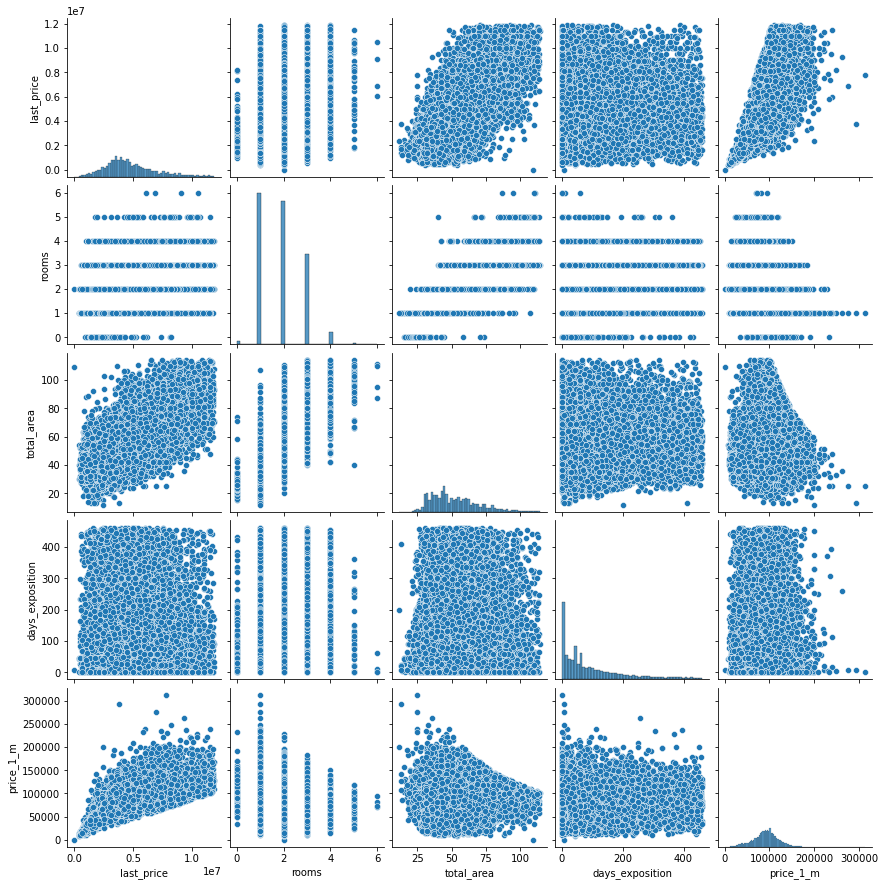

In [36]:
sns.pairplot(df_good[['last_price', 'rooms', 'total_area', 'days_exposition', 'price_1_m']])
plt.show()

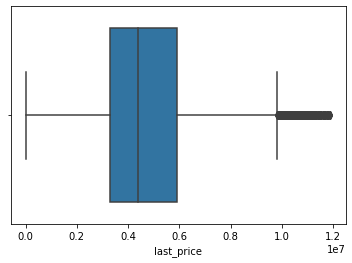

In [38]:
sns.boxplot(x = (df_good['last_price']))
plt.show()